<a href="https://colab.research.google.com/github/alshashiguchi/deeplearning/blob/master/Classificacao_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Carregando dataset

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_treino)
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibir os dados

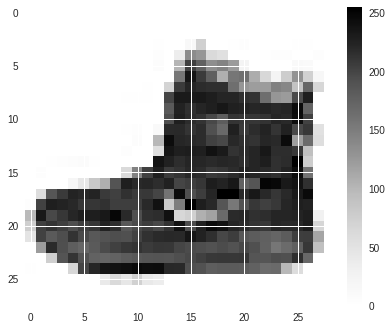

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta','Calça','Pullover',
                           'Vestido','Casaco','Sandália',
                           'Camiseta','Tênis','Bolsa','Bota']

'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''  
plt.imshow(imagens_treino[0])
plt.colorbar()

In [10]:
#Normalização
imagens_treino = imagens_treino / float(255)

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, 
                       identificacoes_treino, 
                       epochs=10, 
                       validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 177us/step - loss: 1.0470 - acc: 0.6714 - val_loss: 0.6809 - val_acc: 0.7538
Epoch 2/10
48000/48000 [==============================] - 8s 172us/step - loss: 0.6249 - acc: 0.7759 - val_loss: 0.5791 - val_acc: 0.7852
Epoch 3/10
48000/48000 [==============================] - 8s 171us/step - loss: 0.5518 - acc: 0.8032 - val_loss: 0.5291 - val_acc: 0.8112
Epoch 4/10
48000/48000 [==============================] - 8s 174us/step - loss: 0.5096 - acc: 0.8205 - val_loss: 0.5009 - val_acc: 0.8227
Epoch 5/10
48000/48000 [==============================] - 8s 170us/step - loss: 0.4813 - acc: 0.8313 - val_loss: 0.4783 - val_acc: 0.8309
Epoch 6/10
48000/48000 [==============================] - 8s 171us/step - loss: 0.4615 - acc: 0.8374 - val_loss: 0.4659 - val_acc: 0.8303
Epoch 7/10
48000/48000 [==============================] - 8s 170us/step - loss: 0.4466 - acc: 0.8426 - val_loss: 0.4510 - 

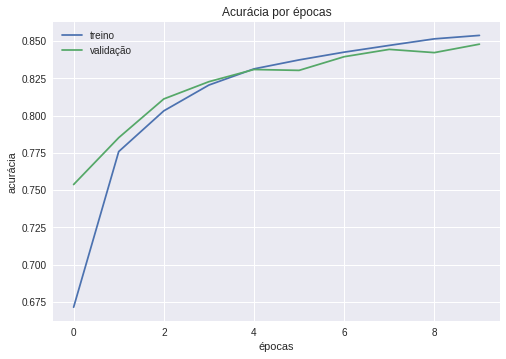

In [11]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

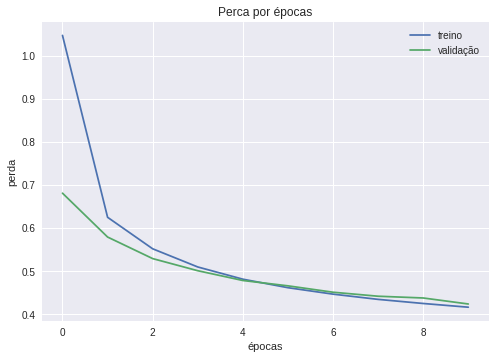

In [12]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perca por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [8]:
testes = modelo.predict(imagens_teste)
print('resultado teste: ', np.argmax(testes[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

resultado teste:  2
número da imagem de teste:  2


In [9]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

10000/10000 [==============================] - 0s 37us/step
Perda do teste:  2.0170569638252185
Acurácia do teste:  0.8737
